In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import lightgbm as lgb
import numpy as np
from catboost import CatBoostClassifier, Pool, cv
import shap
import lime
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.expand_frame_repr', False)

In [6]:
data = pd.read_csv('diabetic_data.csv')

In [7]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
data.shape

(101766, 50)

In [11]:
del data['encounter_id']
del data['patient_nbr']

In [12]:
encoder = LabelEncoder()

In [13]:
data['race_le'] = encoder.fit_transform(data['race'])

In [14]:
data['gender_le'] = encoder.fit_transform(data['gender'])

In [15]:
data['age_le'] = encoder.fit_transform(data['age'])

In [16]:
data['payer_code_le'] = encoder.fit_transform(data['payer_code'])

In [17]:
data['medical_specialty_le'] = encoder.fit_transform(data['medical_specialty'])

In [18]:
data['diag_1_le'] = encoder.fit_transform(data['diag_1'])

In [19]:
data['diag_2_le'] = encoder.fit_transform(data['diag_2'])

In [20]:
data['diag_3_le'] = encoder.fit_transform(data['diag_3'])

In [21]:
data['diag_3_le'] = encoder.fit_transform(data['diag_3'])

In [22]:
data['weight_le'] = encoder.fit_transform(data['weight'])

In [23]:
data['max_glu_serum_le'] = encoder.fit_transform(data['max_glu_serum'])
data['A1Cresult_le'] = encoder.fit_transform(data['A1Cresult'])
data['metformin_le'] = encoder.fit_transform(data['metformin'])
data['repaglinide_le'] = encoder.fit_transform(data['repaglinide'])
data['nateglinide_le'] = encoder.fit_transform(data['nateglinide'])
data['chlorpropamide_le'] = encoder.fit_transform(data['chlorpropamide'])
data['glimepiride_le'] = encoder.fit_transform(data['glimepiride'])
data['acetohexamide_le'] = encoder.fit_transform(data['acetohexamide'])
data['glipizide_le'] = encoder.fit_transform(data['glipizide'])
data['glyburide_le'] = encoder.fit_transform(data['glyburide'])
data['tolbutamide_le'] = encoder.fit_transform(data['tolbutamide'])
data['pioglitazone_le'] = encoder.fit_transform(data['pioglitazone'])


In [24]:
data['rosiglitazone_le'] = encoder.fit_transform(data['rosiglitazone'])
data['acarbose_le'] = encoder.fit_transform(data['acarbose'])
data['miglitol_le'] = encoder.fit_transform(data['miglitol'])
data['troglitazone_le'] = encoder.fit_transform(data['troglitazone'])
data['tolazamide_le'] = encoder.fit_transform(data['tolazamide'])
data['examide_le'] = encoder.fit_transform(data['examide'])
data['citoglipton_le'] = encoder.fit_transform(data['citoglipton'])
data['insulin_le'] = encoder.fit_transform(data['insulin'])
data['glyburide-metformin_le'] = encoder.fit_transform(data['glyburide-metformin'])
data['glipizide-metformin_le'] = encoder.fit_transform(data['glipizide-metformin'])
data['glimepiride-pioglitazone_le'] = encoder.fit_transform(data['glimepiride-pioglitazone'])
data['metformin-rosiglitazone_le'] = encoder.fit_transform(data['metformin-rosiglitazone'])
data['metformin-pioglitazone_le'] = encoder.fit_transform(data['metformin-pioglitazone'])
data['change_le'] = encoder.fit_transform(data['change'])
data['diabetesMed_le'] = encoder.fit_transform(data['diabetesMed'])
#data['readmitted_le'] = encoder.fit_transform(data['readmitted'])

In [25]:
data['readmitted_le'] = data['readmitted'].apply(lambda x: 0 if x=='NO' or x=='>30' else 1)

In [26]:
diabetic_df = data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
                                   'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                                   'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_le', 'gender_le', 'age_le', 
                                   'payer_code_le', 'medical_specialty_le', 'diag_1_le', 'diag_2_le', 'diag_3_le', 'max_glu_serum_le', 
                                   'A1Cresult_le', 'metformin_le', 'repaglinide_le', 'nateglinide_le', 'chlorpropamide_le', 'glimepiride_le', 'acetohexamide_le',
                                   'glipizide_le', 'glyburide_le', 'tolbutamide_le', 'pioglitazone_le', 'rosiglitazone_le', 'acarbose_le', 'miglitol_le', 'troglitazone_le', 
                                   'tolazamide_le', 'examide_le', 'citoglipton_le', 'insulin_le', 'glyburide-metformin_le', 'glipizide-metformin_le', 'glimepiride-pioglitazone_le', 'metformin-rosiglitazone_le', 'metformin-pioglitazone_le', 'change_le', 'diabetesMed_le', 'readmitted_le']]

In [27]:
diabetic_df.head(2)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_le,gender_le,age_le,payer_code_le,medical_specialty_le,diag_1_le,diag_2_le,diag_3_le,max_glu_serum_le,A1Cresult_le,metformin_le,repaglinide_le,nateglinide_le,chlorpropamide_le,glimepiride_le,acetohexamide_le,glipizide_le,glyburide_le,tolbutamide_le,pioglitazone_le,rosiglitazone_le,acarbose_le,miglitol_le,troglitazone_le,tolazamide_le,examide_le,citoglipton_le,insulin_le,glyburide-metformin_le,glipizide-metformin_le,glimepiride-pioglitazone_le,metformin-rosiglitazone_le,metformin-pioglitazone_le,change_le,diabetesMed_le,readmitted_le
0,6,25,1,1,41,0,1,0,0,0,1,3,0,0,0,38,124,650,670,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1,1,1,7,3,59,0,18,0,0,0,9,3,0,1,0,0,143,79,121,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0


## XGBoost

#### Train and Test split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(diabetic_df.drop(columns = ['readmitted_le']), 
                                                    diabetic_df['readmitted_le'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [30]:
xg_dtrain = xgb.DMatrix(data = x_train, label = y_train)
xg_dval = xgb.DMatrix(data = x_val, label = y_val)
xg_dtest = xgb.DMatrix(data = x_test, label = y_test)

C:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [31]:
xg_param = {'max_depth':6,
         'eta': 0.3,
         'silent':1,
         'objective':'binary:logistic',
         'eval_metric': 'auc'
         #,'gamma': ???,
#          ,'lambda': 5, 
#          'alpha': 2 #equal or less than lambda
         #,'min_child_weight': ???,
         #,'colsample_bytree' :??? 
         #,colsample_bynode' : ???
         #,'scale_pos_weight' : ???
         ,'maximize' : 'FALSE'
         ,'n_jobs' : -1
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

In [32]:
# specify validations set to watch performance
xg_watchlist = [(xg_dtrain, 'train'), (xg_dval, 'eval')]
xg_num_round = 25
bst = xgb.train(xg_param, xg_dtrain, xg_num_round, xg_watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.660815	eval-auc:0.64586
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.674293	eval-auc:0.658061
[2]	train-auc:0.679195	eval-auc:0.658715
[3]	train-auc:0.683692	eval-auc:0.66062
[4]	train-auc:0.688189	eval-auc:0.660947
[5]	train-auc:0.692489	eval-auc:0.660673
[6]	train-auc:0.696343	eval-auc:0.660939
[7]	train-auc:0.700753	eval-auc:0.661718
[8]	train-auc:0.703817	eval-auc:0.661668
[9]	train-auc:0.708601	eval-auc:0.661101
[10]	train-auc:0.712059	eval-auc:0.661596
[11]	train-auc:0.716626	eval-auc:0.663208
[12]	train-auc:0.719938	eval-auc:0.663095
[13]	train-auc:0.723821	eval-auc:0.664255
[14]	train-auc:0.727004	eval-auc:0.663846
[15]	train-auc:0.730461	eval-auc:0.665073
[16]	train-auc:0.732852	eval-auc:0.665486
[17]	train-auc:0.735871	eval-auc:0.665523
[18]	train-auc:0.740153	eval-auc:0.665059
[19]	train-auc:0.743335	eval-auc:0.665375
[20]	train-auc:0.745014	eval-au

In [33]:
readmit_train_w_preds = x_train
readmit_train_w_preds['xg_probs'] = bst.predict(xg_dtrain)

readmit_test_w_preds = x_test
readmit_test_w_preds['xg_probs'] = bst.predict(xg_dtest)

In [34]:
y_xg = y_test
scores_xg = readmit_test_w_preds['xg_probs']

In [35]:
fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_xg, scores_xg)
metrics.auc(fpr_xg, tpr_xg)

0.6836849965615179

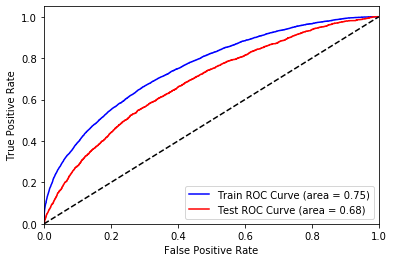

In [36]:
plt.plot(roc_curve(y_train, readmit_train_w_preds['xg_probs'])[0],roc_curve(y_train, readmit_train_w_preds['xg_probs'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, readmit_train_w_preds['xg_probs']))

plt.plot(roc_curve(y_test, readmit_test_w_preds['xg_probs'])[0],roc_curve(y_test, readmit_test_w_preds['xg_probs'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, readmit_test_w_preds['xg_probs']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

We can see from above plot that the model is highly overfitting as train auc is much higher than test

## LightGBM

In [37]:
lgb_train = lgb.Dataset(x_train.drop(columns = ['xg_probs'])
                                          , y_train)
lgb_val = lgb.Dataset(x_val, y_val)

In [38]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth' : 3,
    'num_leaves' : 10,
    'learning_rate': 0.1,
    #'num_threads' : -1,
    #'scale_pos_weight' : ???
    'early_stopping_round' : 10,
    # min_data_in_leaf = ???,
    # pos_bagging_fraction = ???,
    # neg_bagging_fraction = ???,
    # bagging_freq = ???,
    # max_delta_step = ???,
    #'top_rate' : ???
    #'other_rate' : ???
    'lambda_l1' : 10,
    'lambda_l2' : 100
}

In [39]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_train,
                num_boost_round = 100, valid_sets = [lgb_val, lgb_train],
               valid_names = ['Evaluation', 'Train'])

C:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	Train's auc: 0.630169	Evaluation's auc: 0.626188
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.639819	Evaluation's auc: 0.639627
[3]	Train's auc: 0.645722	Evaluation's auc: 0.638947
[4]	Train's auc: 0.646949	Evaluation's auc: 0.641354
[5]	Train's auc: 0.646144	Evaluation's auc: 0.639575
[6]	Train's auc: 0.647467	Evaluation's auc: 0.641344
[7]	Train's auc: 0.646723	Evaluation's auc: 0.63972
[8]	Train's auc: 0.646717	Evaluation's auc: 0.638924
[9]	Train's auc: 0.648563	Evaluation's auc: 0.641004
[10]	Train's auc: 0.649097	Evaluation's auc: 0.640612
[11]	Train's auc: 0.649934	Evaluation's auc: 0.641736
[12]	Train's auc: 0.650563	Evaluation's auc: 0.642077
[13]	Train's auc: 0.651131	Evaluation's auc: 0.642576
[14]	Train's auc: 0.651697	Evaluation's auc: 0.64311
[15]	Train's auc: 0.651952	Evaluation's auc: 0.643155
[16]	Train's auc: 0.651786	Evaluation's auc: 0.643192
[17]	Train's auc: 0.652238	Evaluation's auc: 0.643691
[18]	Train's auc: 0.653569	Evalu

In [40]:
lgb_y_probs_train = lgb_gbm.predict(x_train.drop(columns = ['xg_probs']))
lgb_y_probs_test = lgb_gbm.predict(x_test)

In [41]:
fpr_train_lgb, tpr_train_lgb, thresholds_train_lgb = metrics.roc_curve(y_train, lgb_y_probs_train)
metrics.auc(fpr_train_lgb, tpr_train_lgb)

0.6803257691488629

In [42]:
fpr_test_lgb, tpr_test_lgb, thresholds_test_lgb = metrics.roc_curve(y_test, lgb_y_probs_test)
metrics.auc(fpr_test_lgb, tpr_test_lgb)

0.6780212651476486

We can see that the model is not overfitting in this case as train and test auc's are within 0.01.

In [43]:
x_train_cat = x_train.drop(columns = ['xg_probs'])
x_val_cat = x_val
x_test_cat = x_test.drop(columns = ['xg_probs'])

In [44]:
predictors_cat = x_train_cat
categorical_var_cat = np.where(predictors_cat.dtypes != np.float)[0]


CAT Boost

In [47]:
cat_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    random_seed=42,
    iterations = 10,
    learning_rate = 0.03,
    early_stopping_rounds = 10,
    #l2_leaf_reg = ???
    depth = 3)

In [48]:
cat_boost_model.fit(x_train_cat, y_train, cat_features=categorical_var_cat, eval_set=(x_val_cat, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6695421	test: 0.6697077	best: 0.6697077 (0)	total: 66.2ms	remaining: 596ms
1:	learn: 0.6475671	test: 0.6478915	best: 0.6478915 (1)	total: 144ms	remaining: 575ms
2:	learn: 0.6271143	test: 0.6275927	best: 0.6275927 (2)	total: 184ms	remaining: 428ms
3:	learn: 0.6080203	test: 0.6086710	best: 0.6086710 (3)	total: 223ms	remaining: 334ms
4:	learn: 0.5903193	test: 0.5911147	best: 0.5911147 (4)	total: 258ms	remaining: 258ms
5:	learn: 0.5738749	test: 0.5748099	best: 0.5748099 (5)	total: 280ms	remaining: 187ms
6:	learn: 0.5585628	test: 0.5596331	best: 0.5596331 (6)	total: 330ms	remaining: 141ms
7:	learn: 0.5443374	test: 0.5455392	best: 0.5455392 (7)	total: 383ms	remaining: 95.8ms
8:	learn: 0.5310957	test: 0.5324241	best: 0.5324241 (8)	total: 444ms	remaining: 49.4ms
9:	learn: 0.5187802	test: 0.5202324	best: 0.5202324 (9)	total: 490ms	remaining: 0us

bestTest = 0.5202324058
bestIteration = 9



In [49]:
catboost_probs_train = cat_boost_model.predict_proba(x_train_cat)
catboost_probs_test = cat_boost_model.predict_proba(x_test_cat)

In [50]:
catboost_probs_df_train = pd.DataFrame(catboost_probs_train)
catboost_probs_df_train = catboost_probs_df_train.add_prefix('cat')

catboost_probs_df = pd.DataFrame(catboost_probs_test)
catboost_probs_df = catboost_probs_df.add_prefix('cat')
fprc_cat_train, tprc_cat_train, thresholds_cat_train = metrics.roc_curve(y_train, catboost_probs_df_train['cat1'])
metrics.auc(fprc_cat_train, tprc_cat_train)

0.522629535780621

In [51]:
fprc_cat_test, tprc_cat_test, thresholds_cat_test = metrics.roc_curve(y_test, catboost_probs_df['cat1'])
metrics.auc(fprc_cat_test, tprc_cat_test)

0.5160243451323128

We can see that the model is underfitting as it is just slightly better than random case which is 0.5

In [ ]:
So out of all the models LightGBM performs best with least overfitting and test auc of 0.678

## Part II: SHAP Values

<Figure size 1440x1440 with 0 Axes>

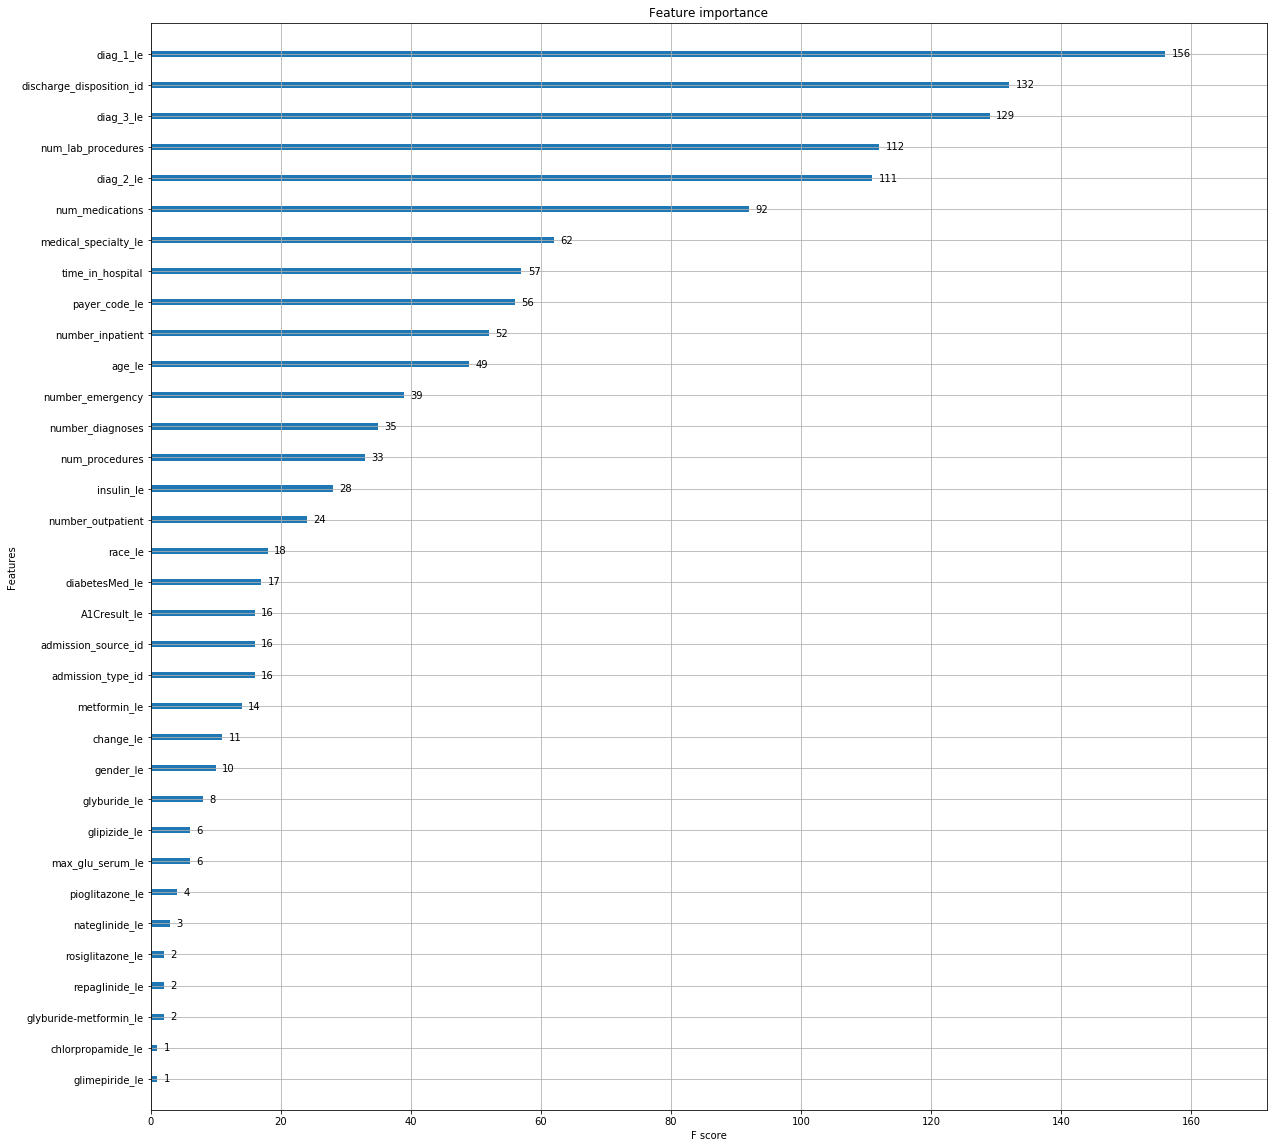

In [52]:
figure(num=None, figsize = (20,20))
xgb_cover_imp_plot = xgb.plot_importance(bst)
fig = xgb_cover_imp_plot.figure
fig.set_size_inches(20,20)
# discharge_disposition_id - Most important variable

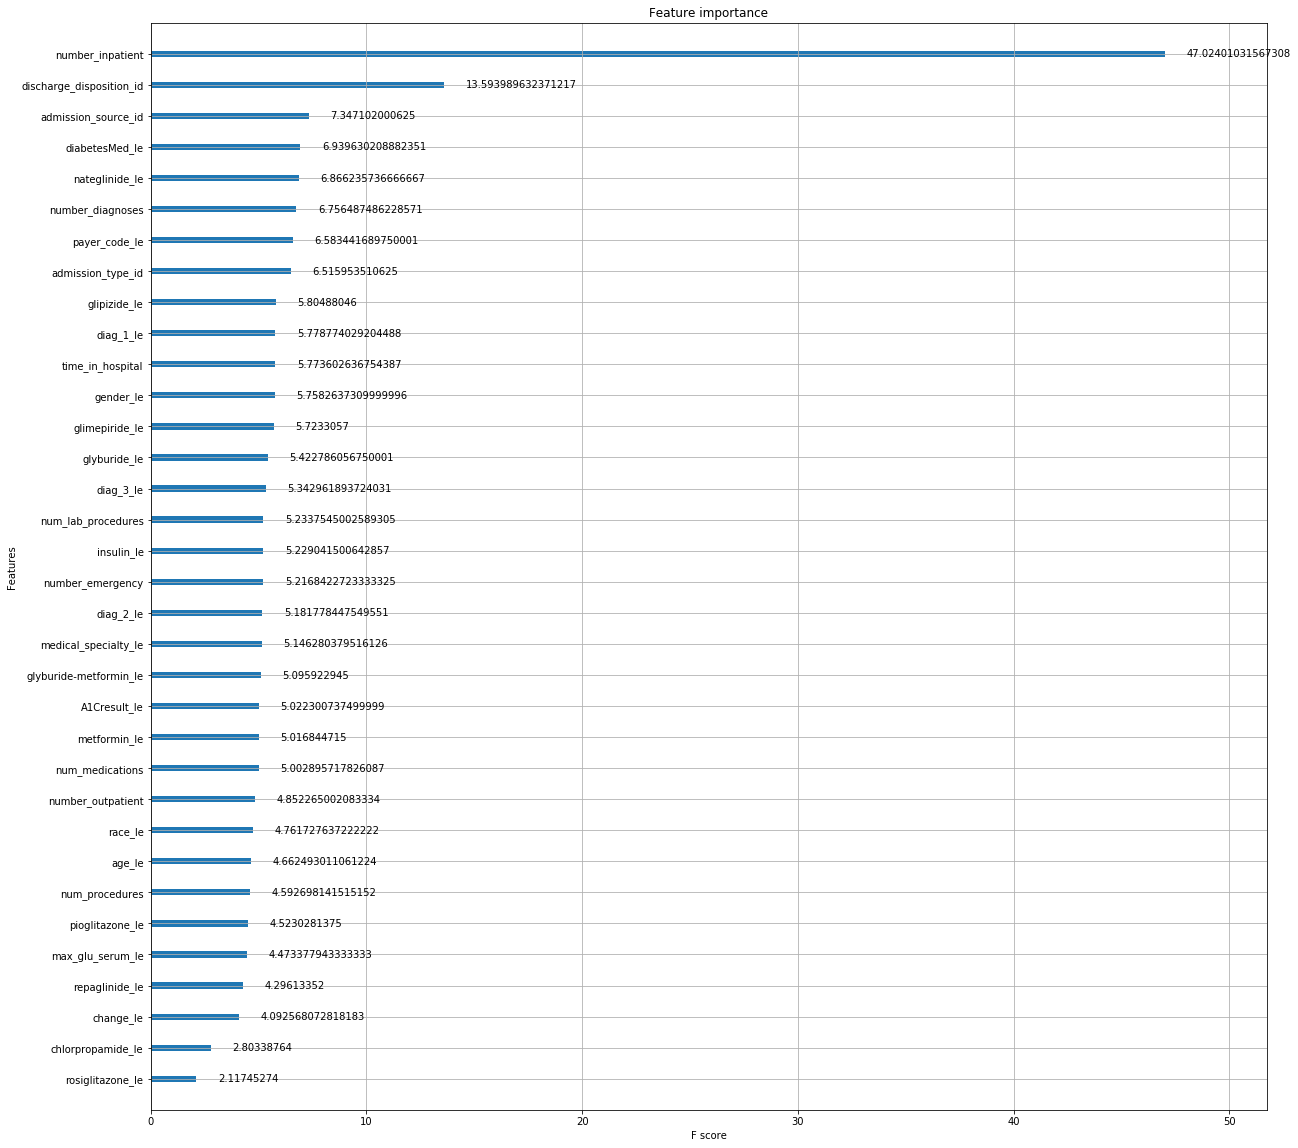

In [53]:
xgb_gain_plot = xgb.plot_importance(bst, importance_type = "gain")
fig = xgb_gain_plot.figure
fig.set_size_inches(20,20)

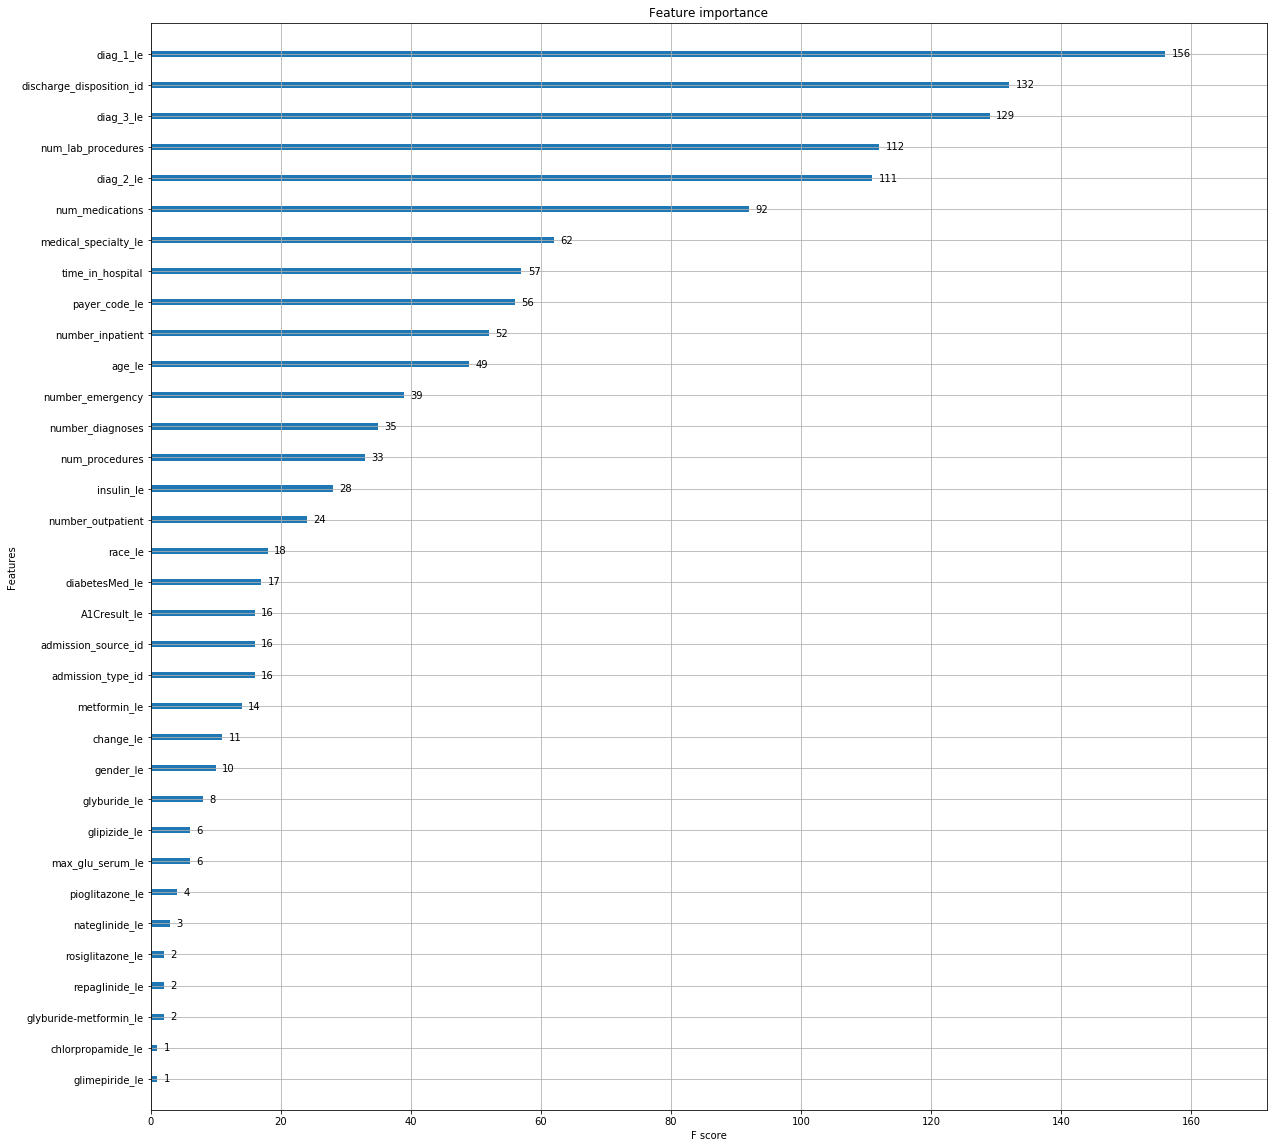

In [54]:
xgb_weight_plot = xgb.plot_importance(bst, importance_type = "weight")
fig = xgb_weight_plot.figure
fig.set_size_inches(20,20)

In [55]:
xgb_shap_explainer = shap.TreeExplainer(bst)

In [56]:
xgb_shap_vals_train = xgb_shap_explainer.shap_values(x_train.drop(columns = ['xg_probs']))

In [57]:
xgb_shap_vals_test = xgb_shap_explainer.shap_values(x_test.drop(columns = ['xg_probs']))

In [58]:
shap.initjs()
shap.force_plot(xgb_shap_explainer.expected_value, xgb_shap_vals_train[0,:], x_train.drop(columns = ['xg_probs']).iloc[0,:])

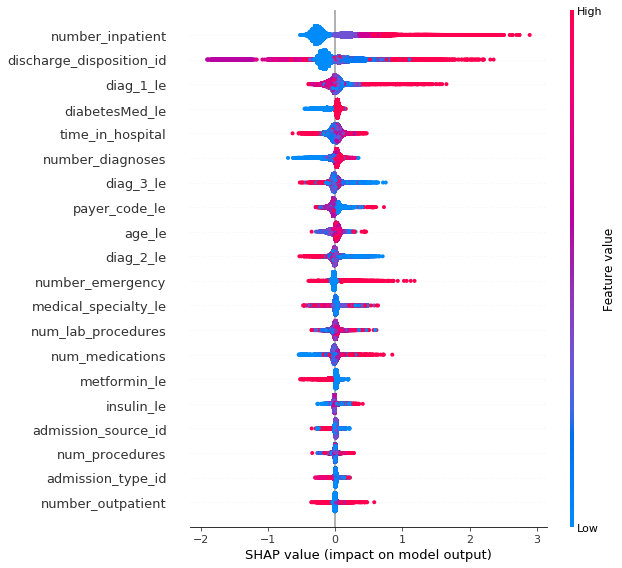

In [59]:
shap.summary_plot(xgb_shap_vals_train, x_train.drop(columns = ['xg_probs']))

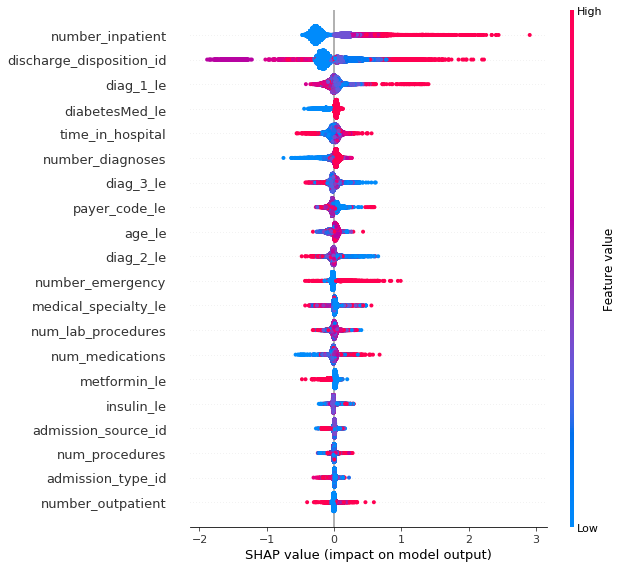

In [60]:
shap.summary_plot(xgb_shap_vals_test, x_test.drop(columns = ['xg_probs']))

In [61]:
xgb_var_interactions = shap.TreeExplainer(bst).shap_interaction_values(x_test.drop(columns = ['xg_probs']))

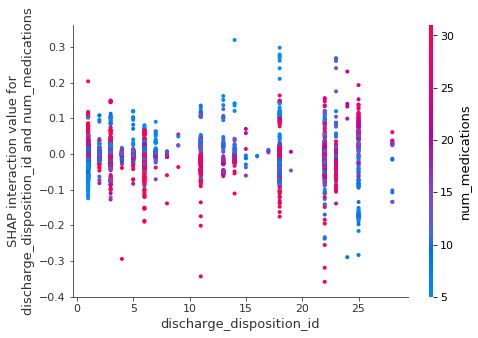

In [62]:
shap.dependence_plot(("discharge_disposition_id", "num_medications"),xgb_var_interactions, 
                     x_test.drop(columns = ['xg_probs']),display_features = x_test.drop(columns = ['xg_probs']))

## Part III Gridsearch

In [68]:
import lightgbm as lgb
from hyperband import HyperbandSearchCV
hb_lgb = lgb.LGBMClassifier()
import numpy as np
hb_lgb_param_dict = {'max_depth' : np.arange(50, 101),
                    'learning_rate' : np.arange(0.001, 0.1),
                    'n_estimators' : np.arange(10, 90),
                    'objective' : ['binary'],
                    'gamma' : [0,1],
                    'min_child_weight' : [3,4],
                    'subsample' : [0.5,1],
                    'colsample_by_tree' : [0.6, 1],
                    'reg_alpha' : [5,10],
                    'reg_lambda' : [0.01, 0.1, 0.5, 1, 2]
                    }
lgb_search = HyperbandSearchCV(hb_lgb, hb_lgb_param_dict, cv=3,
                           verbose = 1,
                           max_iter=20,min_iter=5,
                           scoring='f1_macro')

In [69]:
lgb_search.fit(x_train,y_train)

Starting bracket 1 (out of 2) of hyperband
Starting successive halving iteration 1 out of 2. Fitting 3 configurations, with resource_param n_estimators set to 6, and keeping the best 1 configurations.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s finished


Starting successive halving iteration 2 out of 2. Fitting 1 configurations, with resource_param n_estimators set to 20
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


Starting bracket 2 (out of 2) of hyperband
Starting successive halving iteration 1 out of 1. Fitting 2 configurations, with resource_param n_estimators set to 20
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s finished


HyperbandSearchCV(cv=3, error_score='raise',
         estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
         eta=3, iid=True, max_iter=20, min_iter=5, n_jobs=1,
         param_distributions={'max_depth': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97...[0.5, 1], 'colsample_by_tree': [0.6, 1], 'reg_alpha': [5, 10], 'reg_lambda': [0.01, 0.1, 0.5, 1, 2]},
         pre_dispatch='2*n_jobs', ra

In [70]:
lgb_search.best_score_

0.4703150668912493

In [71]:
lgb_search.best_params_

{'subsample': 1,
 'reg_lambda': 0.5,
 'reg_alpha': 5,
 'objective': 'binary',
 'n_estimators': 6,
 'min_child_weight': 4,
 'max_depth': 55,
 'learning_rate': 0.001,
 'gamma': 0,
 'colsample_by_tree': 1}

In [73]:
lgb_new_param = {'subsample': 1,
 'reg_lambda': 0.5,
 'reg_alpha': 5,
 'objective': 'binary',
 'n_estimators': 6,
 'min_child_weight': 4,
 'max_depth': 55,
 'learning_rate': 0.001,
 'gamma': 0,
 'colsample_by_tree': 1}

lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_train,
                num_boost_round = 100, valid_sets = [lgb_val, lgb_train],
               valid_names = ['Evaluation', 'Train'])

In [76]:
lg_watchlist = [(lgb_train, 'train'), (lgb_val, 'eval')]
lg_num_round = 25 #This is another hyperparameter of sorts
bst = lgb.train(params=lgb_new_param,train_set= lgb_train,num_boost_round =  lg_num_round, valid_sets = [lgb_val, lgb_train], valid_names = ['Evaluation', 'Train'])

[1]	Train's binary_logloss: 0.350809	Evaluation's binary_logloss: 0.356265
[2]	Train's binary_logloss: 0.350765	Evaluation's binary_logloss: 0.356222
[3]	Train's binary_logloss: 0.350721	Evaluation's binary_logloss: 0.35618
[4]	Train's binary_logloss: 0.350677	Evaluation's binary_logloss: 0.356137
[5]	Train's binary_logloss: 0.350634	Evaluation's binary_logloss: 0.356095
[6]	Train's binary_logloss: 0.35059	Evaluation's binary_logloss: 0.356053


In [79]:
readmit_train_w_preds = x_train
readmit_train_w_preds['lg_probs'] = bst.predict(x_train.drop(columns = ['xg_probs']))

In [83]:
readmit_test_w_preds = x_test
readmit_test_w_preds['lg_probs'] = bst.predict(x_test)

In [81]:
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_train, readmit_train_w_preds['lg_probs'])
metrics.auc(fpr_xg, tpr_xg)

0.6836849965615179

In [84]:
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_test, readmit_test_w_preds['lg_probs'])
metrics.auc(fpr_xg, tpr_xg)

0.6836849965615179

We can see from above scores that the model is fitting well. Only thing I can do is play around with the hyper-parametrs to increase the auc